# Tarefa 1
Rafael Ragozoni Conrado 
290268

Defina uma pergunta. Escolha um dataset num dos repositórios RDatasets, UC Irvine Machine Learning Repository, Kaggle e Base dos Dados (dados tratados). Use os recursos disponíveis em ggplot2/plotnine para explorar os dados do dataset selecionado e o procedimento de resolução de problemas discutido para responder a pergunta formulada.     

 A pergunta a ser respondida é: regulamentação de armas diminui a violência?

### Importação das bibliotecas necessárias

In [2]:
import numpy as np
import pandas as pd
from plotnine import *

### Carregar a base de dados com Pandas
A base for carregada nesse [link](https://vincentarelbundock.github.io/Rdatasets/csv/AER/Guns.csv)

In [3]:
data = pd.read_csv('Guns.csv')
data.head()

rownames  year  violent  murder  robbery  prisoners      afam      cauc  \
0         1  1977    414.4    14.2     96.8         83  8.384873  55.12291   
1         2  1978    419.1    13.3     99.1         94  8.352101  55.14367   
2         3  1979    413.3    13.2    109.5        144  8.329575  55.13586   
3         4  1980    448.5    13.2    132.1        141  8.408386  54.91259   
4         5  1981    470.5    11.9    126.5        149  8.483435  54.92513   

       male  population    income   density    state law  
0  18.17441    3.780403  9563.148  0.074552  Alabama  no  
1  17.99408    3.831838  9932.000  0.075567  Alabama  no  
2  17.83934    3.866248  9877.028  0.076245  Alabama  no  
3  17.73420    3.900368  9541.428  0.076829  Alabama  no  
4  17.67372    3.918531  9548.351  0.077187  Alabama  no

Como pode ser visto acima o dataset conta com os seguintes dados:
 - violent: Crimes violentos por 100.000 pessoas

 - murder: Assassinatos por 100.000 pessoas

 - robbery: Roubos por 100.000 pessoas
 
 - prioseners: Prisioneiros presos no ano anterior por 100.000 pessoas
  
 - afam: Porcentagem da população Afro-americana do estado (idades de 10 a 64 anos)
  
 - cauc: Porcentagem da população Caucasiana do estado (idades de 10 a 64 anos)
  
 - male: Porcentagem da população Masculina do estado (idades de 10 a 29 anos)
  
 - population: População do estado em milhões de pessoas
  
 - income: Renda pessoal per capita no estado em dolares
  
 - density: População/milha quadrada de área do estado dividida por 1000
  
 - state: Nome do estado.
  
 - law: Aplicação de lei que dificulta porte de arma.

É interessante saber quais as taxas de violência de cada estado.

Para isso será tirada a média das taxas de violência por cada estado entre 1977 e 1999 e ordenados de forma a mostrar do estado mais violento ao menos.

In [4]:
violent_mean = data.groupby('state')['violent'].mean()
violent_mean.columns = ['state', 'violent']
violent_mean.sort_values(ascending=False)

state
District of Columbia    2048.978261
Florida                  999.234783
New York                 941.317391
California               877.482609
Maryland                 853.634783
Illinois                 828.165217
South Carolina           800.265217
Louisiana                778.439130
Nevada                   755.034783
New Mexico               743.869565
Michigan                 695.213043
Massachusetts            616.717391
Texas                    612.656522
Arizona                  608.095652
Alaska                   596.795652
Georgia                  595.578261
Missouri                 582.652174
Tennessee                580.682609
Delaware                 564.356522
Alabama                  558.173913
New Jersey               552.821739
North Carolina           526.395652
Oregon                   496.339130
Oklahoma                 491.586957
Colorado                 482.786957
Washington               447.721739
Ohio                     445.452174
Arkansas              

Como é possível ver acima, o estado mais violento no período é 'District of Columbia' com cerca 2048 crimes violentos para cada 100.000 pessoas e o menos 'North Dakota' com cerca de 68 crimes violentos para cada 100.000 pessoas.

Como 'District of Columbia' é muito distante de todos outros estados e pode afetar a analíse, o mesmo será retirado.

Para melhor vizualização será mostrado um gráfico comparando.

In [5]:
print(len(data))
data = data[data['state']!= 'District of Columbia']
len(data)

1173


1150

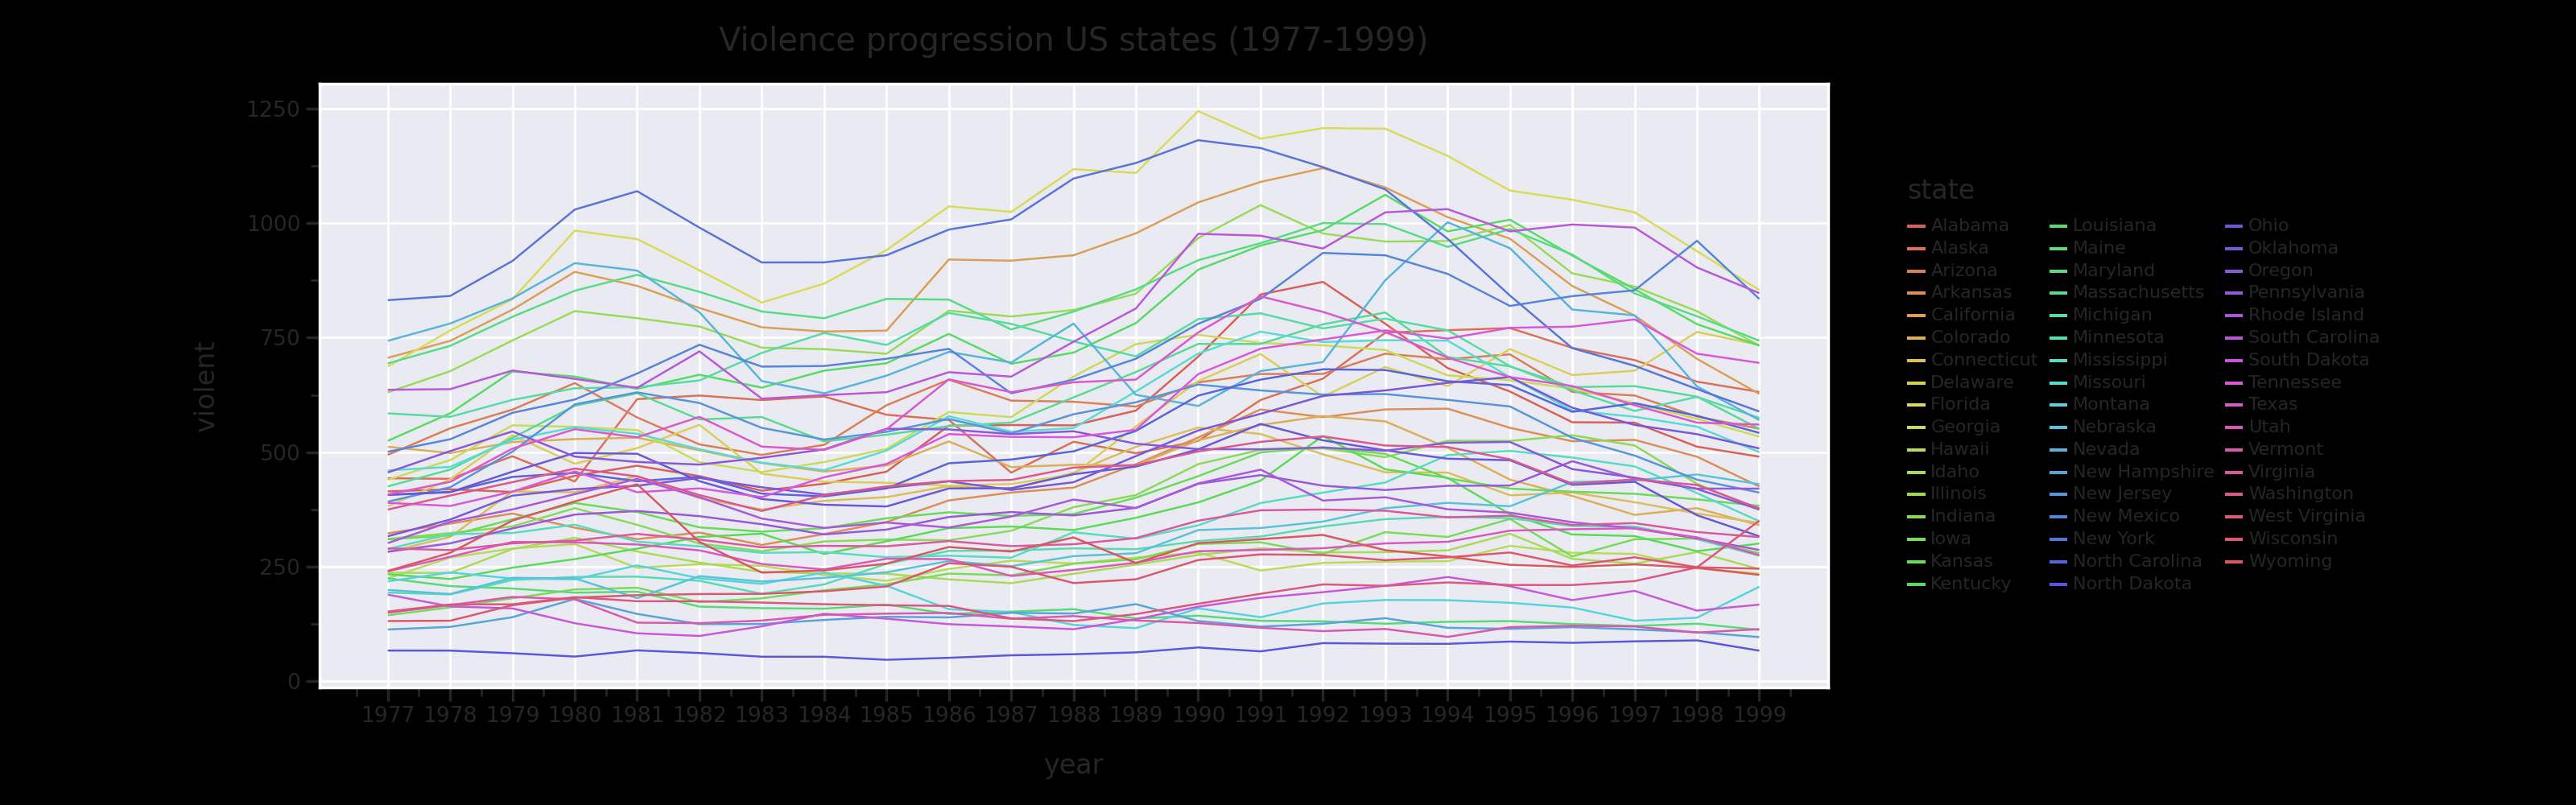

In [6]:


p = ggplot(data) + aes(x= 'year', y= 'violent', color = 'state') + geom_line() \
    + scale_x_continuous(breaks = data['year'].unique()) \
    + theme_seaborn() \
    + theme(aspect_ratio=0.4, legend_key_width=8, legend_text=element_text(size=8), figure_size=(16,5)) \
    + ggtitle('Violence progression US states (1977-1999)') 
p

O gráfico, partindo de y = 0, mostra a comparação entre a violência nos estados ao longo dos anos, mas seria interessante mostrar a diferença entre estados que regulamentaram o porte de arma e que não regulamentaram.

Para isso, será separado o dataframe em 2, estados que regumelamentaram e que não regulamentaram.

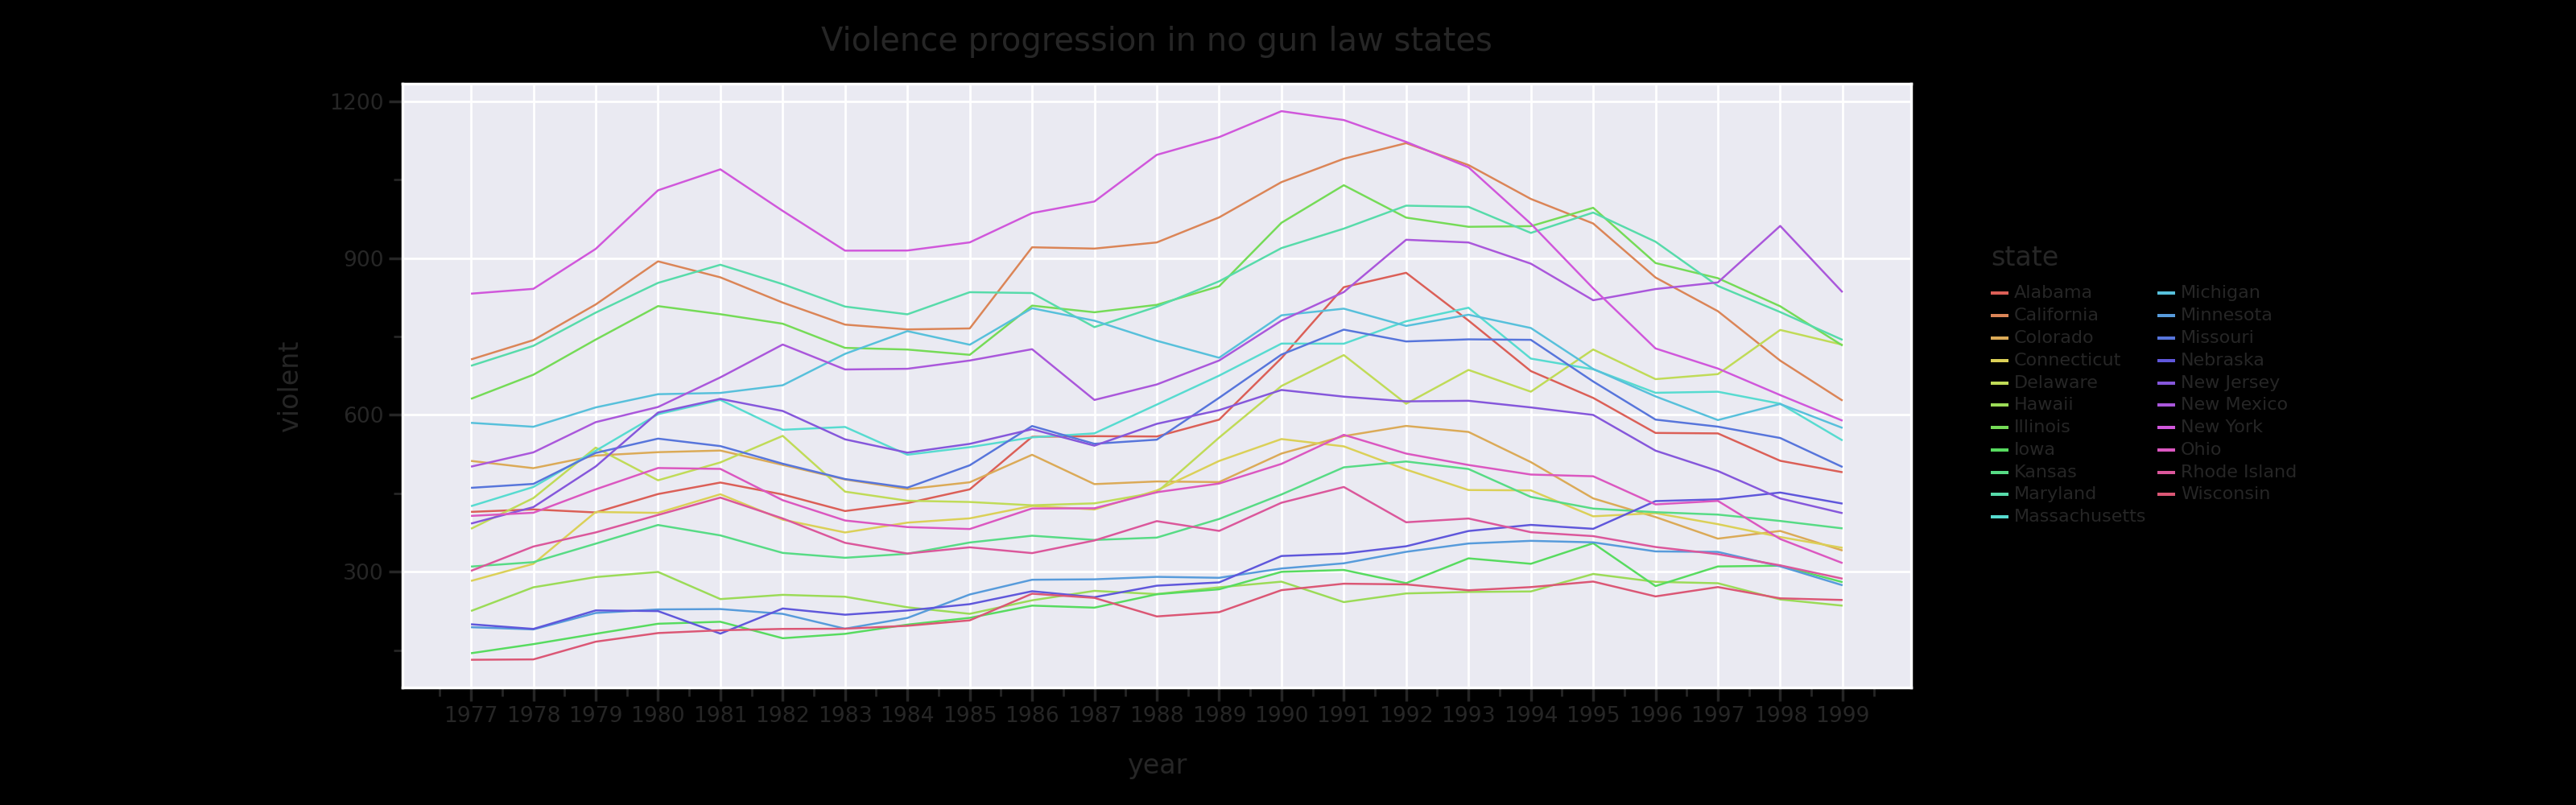

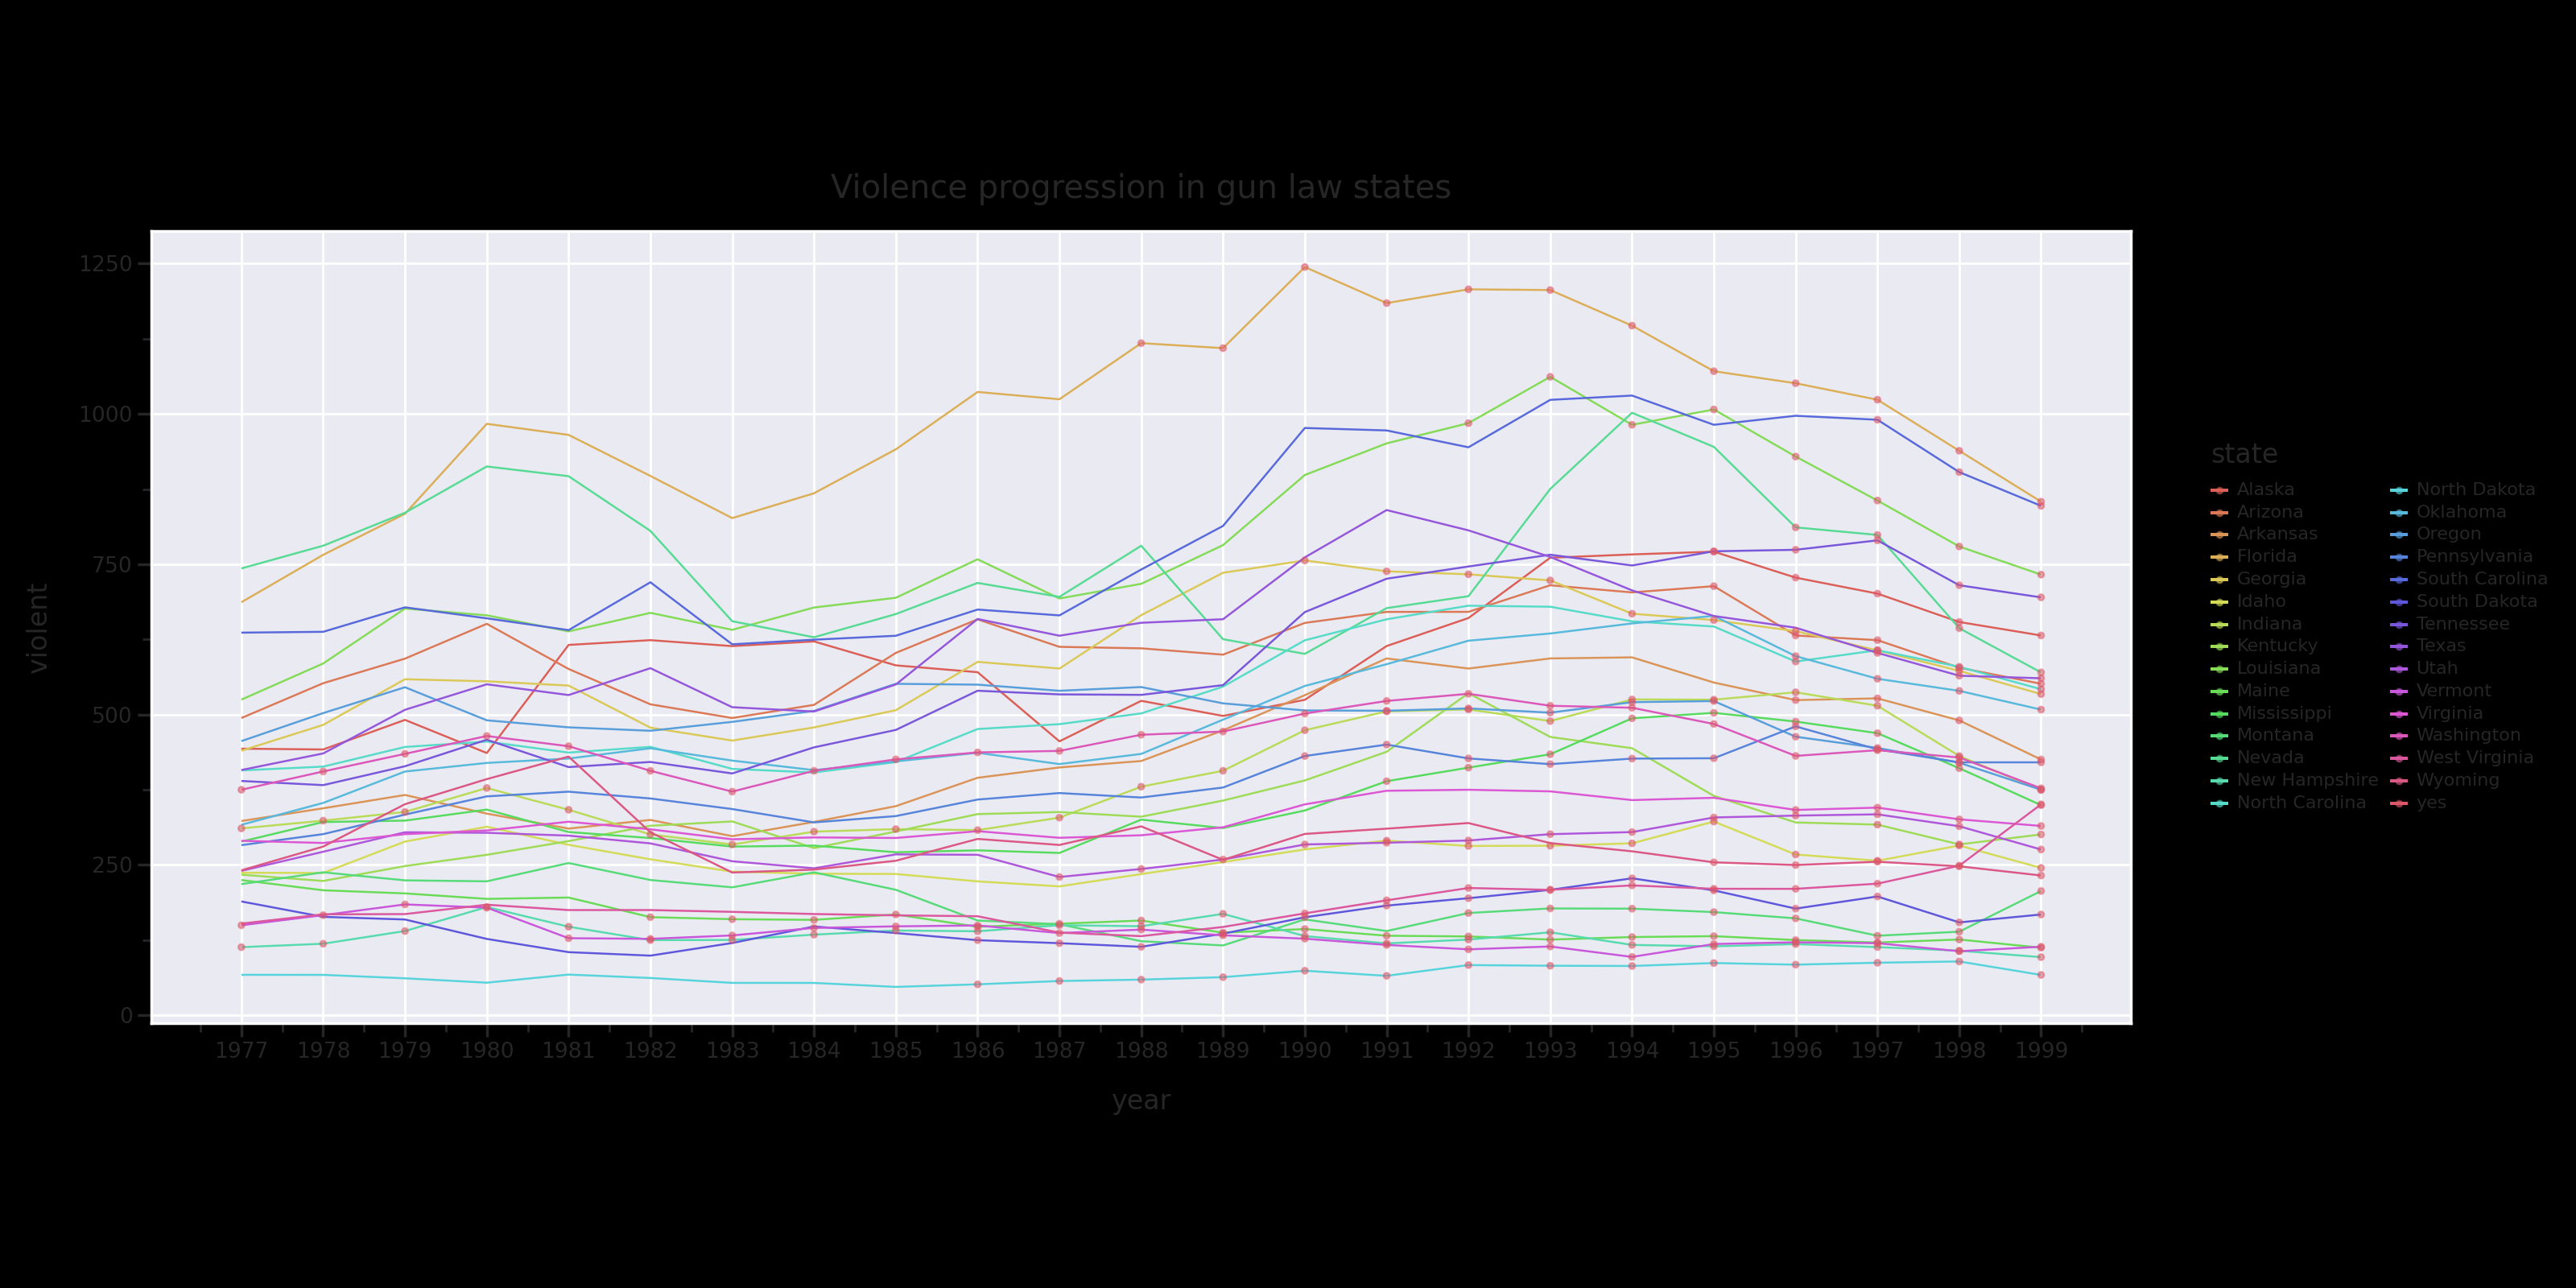

In [7]:
law_yes = data[data['law'] == 'yes']

yes_list = law_yes['state'].unique().tolist()
no_list = list(set(data['state'].unique().tolist()) - set(yes_list))

law_yes = data[data['state'].isin(yes_list)]
law_no = data[data['state'].isin(no_list)]

yes_plot = ggplot(law_yes) \
    + aes(x='year', y='violent', color='state') \
    + geom_line() \
    + geom_point(aes(color='law'), size = 1, data = law_yes[law_yes['law'] == 'yes'], alpha= 0.5)\
    + scale_x_continuous(breaks = data['year'].unique()) \
    + ggtitle('Violence progression in gun law states') \
    + theme_seaborn() \
    + theme(aspect_ratio=0.4, legend_key_width=8, legend_text=element_text(size=8), figure_size=(16,8)) 
no_plot = ggplot(law_no) \
    + aes(x='year', y='violent', color='state') \
    + geom_line() \
    + scale_x_continuous(breaks = data['year'].unique()) \
    + ggtitle('Violence progression in no gun law states') \
    + theme_seaborn() \
    + theme(aspect_ratio=0.4, legend_key_width=8, legend_text=element_text(size=8), figure_size=(16,5)) 
no_plot.show()
yes_plot.show()

Os gráficos acima são de violência por ano onde não teve lei restritiva para o porte de arma e onde teve. No segundo os pontos indicam anos onde a lei estava em vigor.

No geral, é possível ver que estados que acataram a lei tiveram uma redução na taxa de violência comparada com o ínicio do período. Mas para melhor visualização serão comparadas as mudanças na violência.

In [8]:
is_marked_state = np.where(data['state'].isin(yes_list), 'yes', 'no')
data['law_status'] = is_marked_state

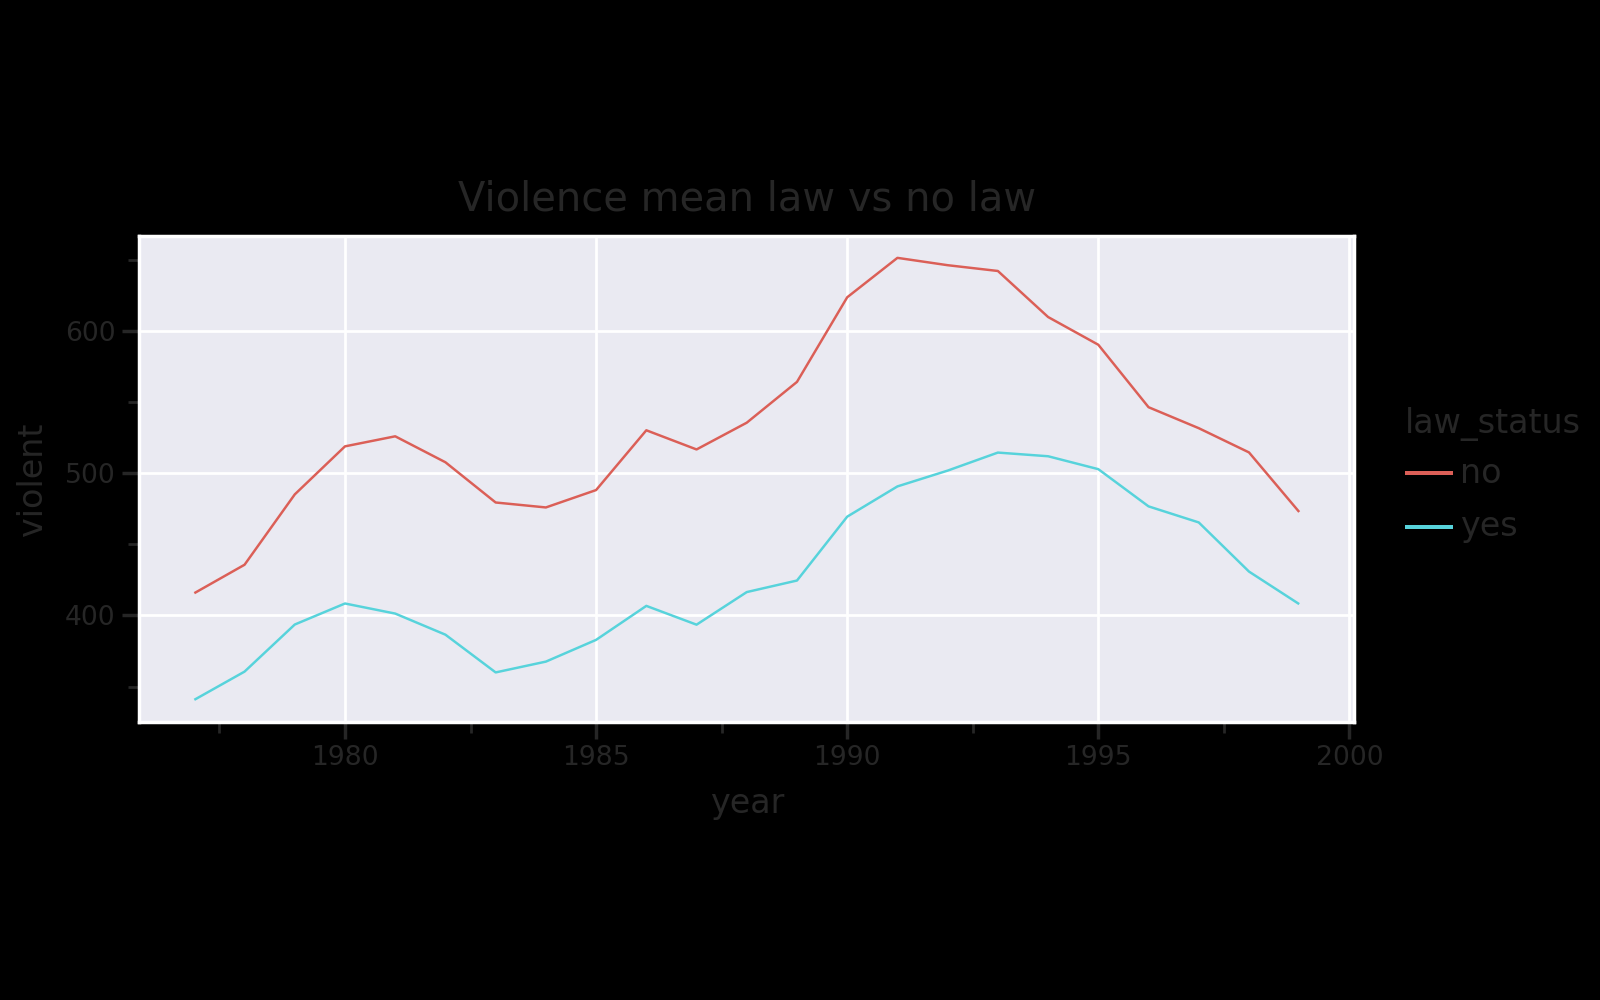

In [9]:
law_means = data.groupby(['year', 'law_status'])['violent'].mean().reset_index()

mean_plot = ggplot(law_means) \
    + aes(x='year', y='violent', color = 'law_status') \
    + geom_line() \
    + ggtitle('Violence mean law vs no law') \
    + theme_seaborn() \
    + theme(aspect_ratio=0.4, figure_size=(8,5)) 

mean_plot.show()

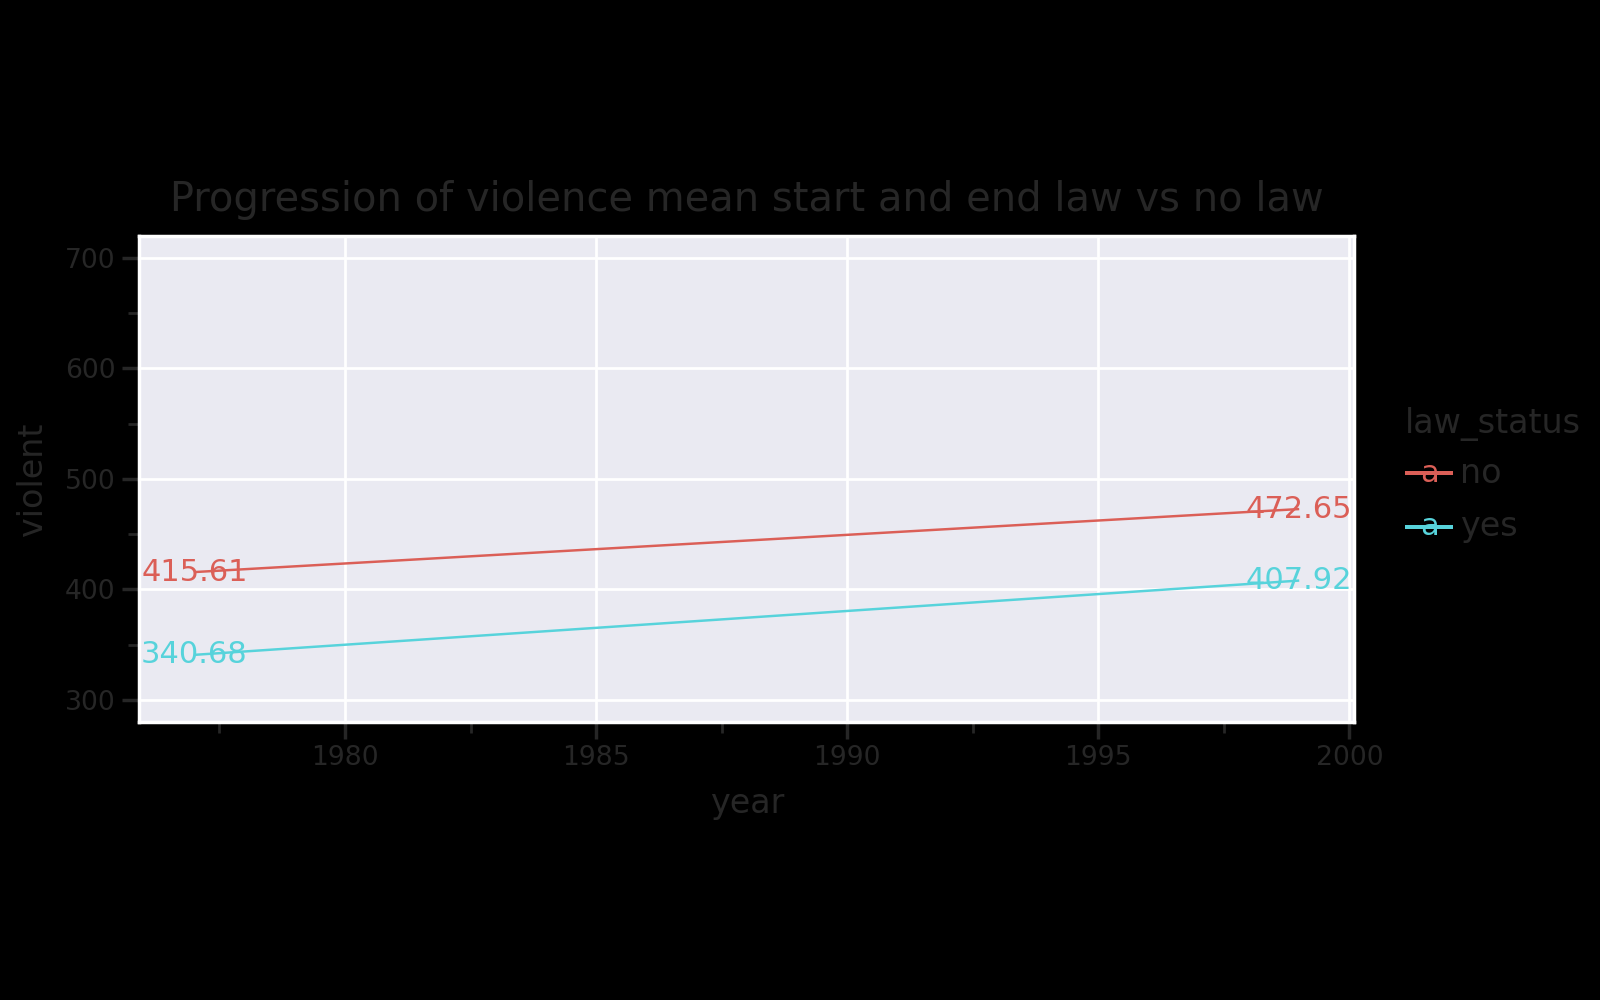

In [12]:
diff = law_means[law_means['year'].isin([1977, 1999])]
diff_plot = ggplot(diff) \
    + aes(x='year', y='violent', color = 'law_status') \
    + geom_line() \
    + geom_text(aes(label=round(diff['violent'], 2)))\
    + ylim(300, 700) \
    + ggtitle('Progression of violence mean start and end law vs no law') \
    + theme_seaborn() \
    + theme(aspect_ratio=0.4, figure_size=(8,5)) 

diff_plot.show()

Soma da taxa de alteração média de violência ao longo dos anos 

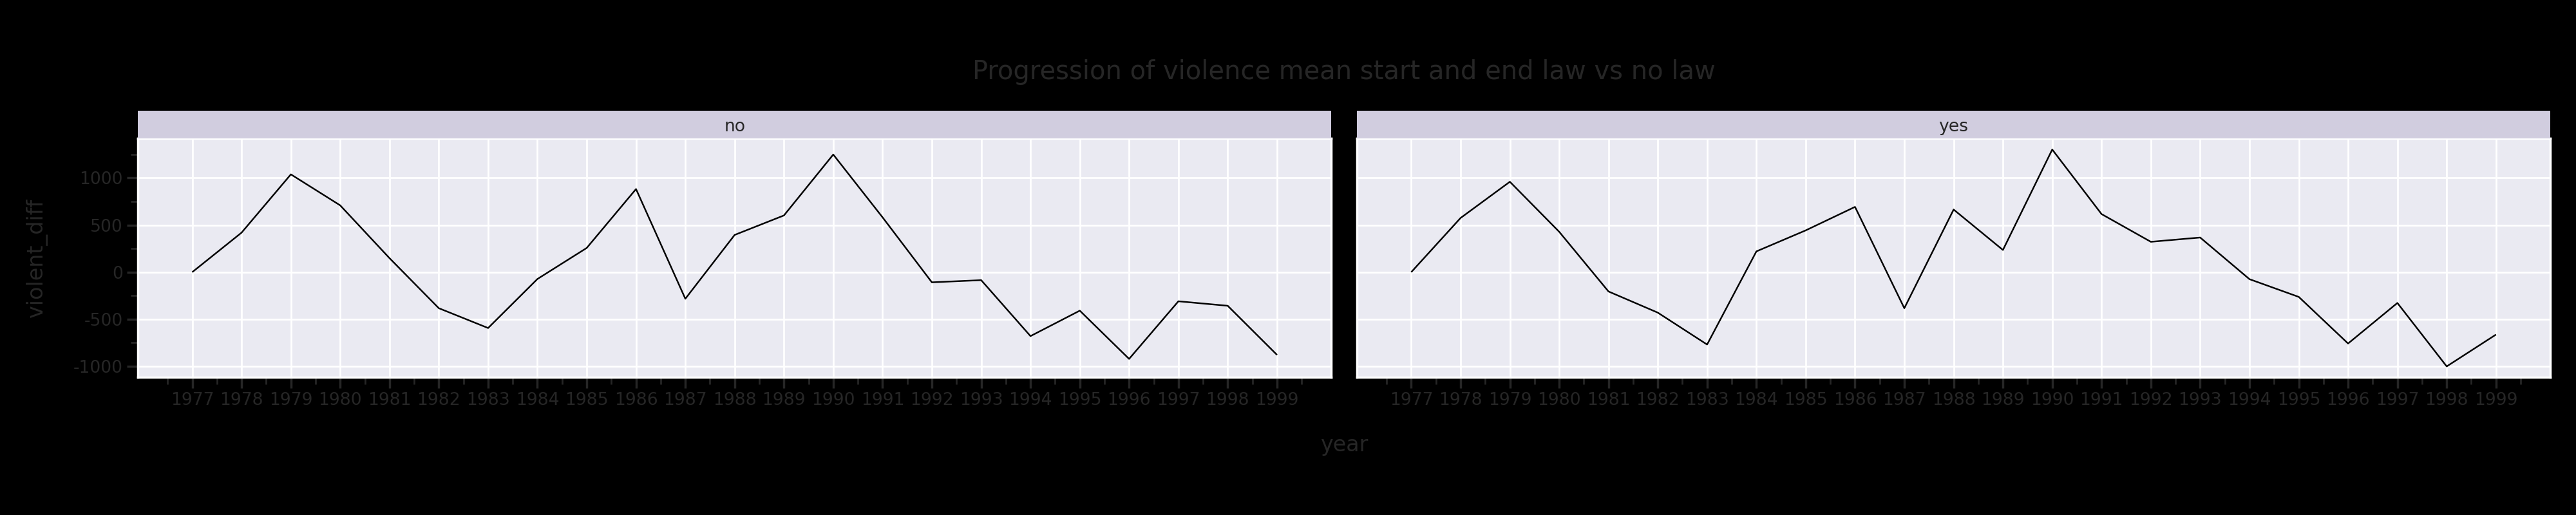

In [11]:
data['violent_diff'] = data.groupby(['state', 'law_status'])['violent'].diff(periods=1).fillna(0)
year_wise_sum = data.groupby(['year', 'law_status'])['violent_diff'].sum()
law_tendency = pd.DataFrame({'year':year_wise_sum.reset_index()['year'], 'law_status':year_wise_sum.reset_index()['law_status'],'violent_diff': year_wise_sum.values})

# law_tendency
law_tendency_plot = ggplot(law_tendency) \
     + aes(x='year', y='violent_diff')  \
     + geom_line() \
     + facet_wrap('law_status', nrow = 1) \
     + scale_x_continuous(breaks = law_tendency['year'].unique()) \
     + ggtitle('Progression of violence mean start and end law vs no law') \
     + theme_seaborn() \
     + theme(aspect_ratio=0.2, figure_size=(20,4))

law_tendency_plot.show()

As conclusões que são vistas nos gráficos são: 
 - As taxas de violência aumentaram similarmente entre estados com e sem lei
  
 - A média de violência dos estados que tiveram lei sobre porte de arma são sempre menores
  
 - Após cerca de 1990 que parece ser o momento mais violento, estados sem controle de armas de fogo reduziram a violência mais rapidamente

A regulamentação não mostrou nenhum efeito significativo em estados que a acataram pela primeira vez no período estudado, onde também pode se ver que todos estados, em média, tiveram suas taxas de violência afetadas de maneira semelhante.